# Objective:-
#####               By using hierarchical and k means clustering on the airlines data to obtain optimum number of clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import xlrd

In [48]:

# import all required library
import xlrd 
import csv
import pandas as pd
  
# open workbook by sheet index,
# optional - sheet_by_index()
sheet = xlrd.open_workbook("EastWestAirlines.xlsx").sheet_by_index(1)
  
# writer object is created
col = csv.writer(open("T.csv",'w'))
  
# writing the data into csv file
for row in range(sheet.nrows):
    # row by row write 
    # operation is perform
    col.writerow(sheet.row_values(row))
  
# read csv file and convert 
# into a dataframe object
airlines = pd.DataFrame(pd.read_csv("T.csv"))
  
# show the dataframe
df.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0


In [50]:
## WE will remove the ID column and store the another dataframe because id is the only serial no.
airlines1 = airlines.drop("ID#", axis = 1)

In [52]:
airlines1.describe()
# See the min & max value of the all variables

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [53]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

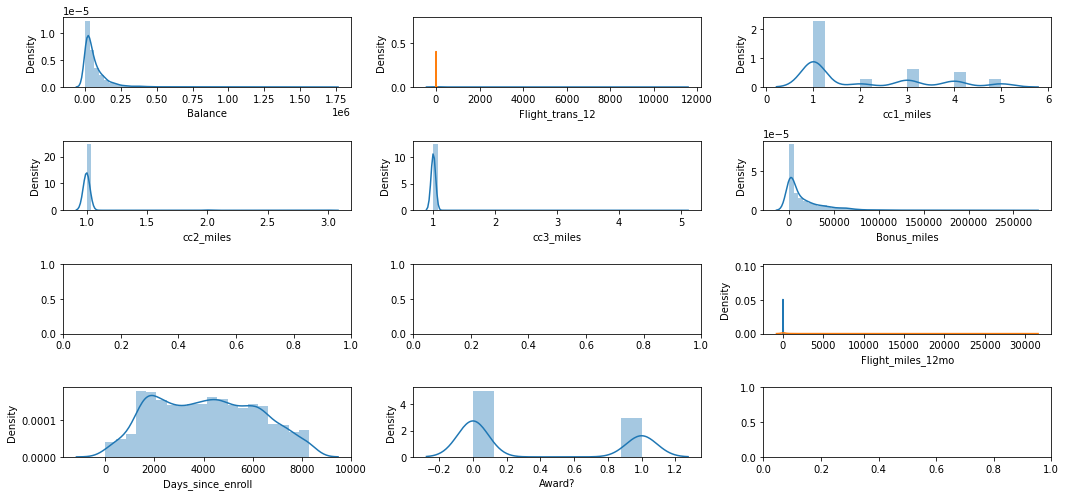

In [57]:
# See the discrition of all variables

fig, ax = plt.subplots(4,3, figsize=(15,7))
sns.distplot(airlines.Balance, ax=ax[0,0])
sns.distplot(airlines.Qual_miles, ax=ax[0,1])
sns.distplot(airlines.cc1_miles, ax=ax[0,2])
sns.distplot(airlines.cc2_miles, ax=ax[1,0])
sns.distplot(airlines.cc3_miles, ax=ax[1,1])
sns.distplot(airlines.Bonus_miles, ax=ax[1,2])
sns.distplot(airlines.Bonus_trans, ax=ax[2,2])
sns.distplot(airlines.Flight_miles_12mo, ax=ax[2,2])
sns.distplot(airlines.Flight_trans_12, ax=ax[0,1])
sns.distplot(airlines.Days_since_enroll, ax = ax[3,0])
sns.distplot(airlines["Award?"], ax = ax[3,1])
plt.tight_layout()
plt.show()

C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Perumal\anaconda

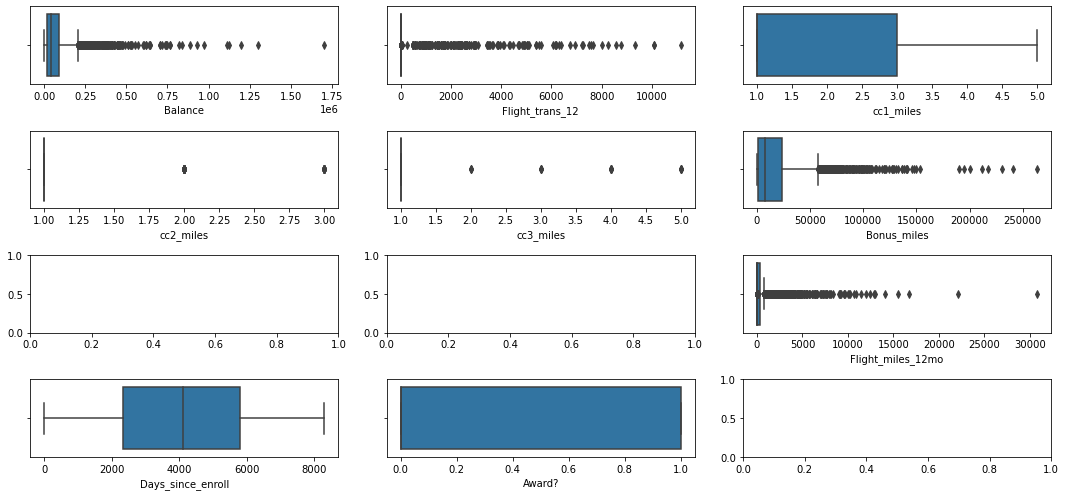

In [58]:
# We will check the outlier in the dataset
fig, ax = plt.subplots(4,3, figsize=(15,7))
sns.boxplot(airlines.Balance, ax=ax[0,0])
sns.boxplot(airlines.Qual_miles, ax=ax[0,1])
sns.boxplot(airlines.cc1_miles, ax=ax[0,2])
sns.boxplot(airlines.cc2_miles, ax=ax[1,0])
sns.boxplot(airlines.cc3_miles, ax=ax[1,1])
sns.boxplot(airlines.Bonus_miles, ax=ax[1,2])
sns.boxplot(airlines.Bonus_trans, ax=ax[2,2])
sns.boxplot(airlines.Flight_miles_12mo, ax=ax[2,2])
sns.boxplot(airlines.Flight_trans_12, ax=ax[0,1])
sns.boxplot(airlines.Days_since_enroll, ax = ax[3,0])
sns.boxplot(airlines["Award?"], ax = ax[3,1])
plt.tight_layout()
plt.show()

### Now we will use power transform for standrised the distrubution

In [60]:
from sklearn.preprocessing import power_transform # Extract the specific column and convert it as a numpy array
X = airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles", "Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values # Transform the data
x_transformed = power_transform(X, method="yeo-johnson")

C:\Users\Perumal\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [64]:
X = pd.DataFrame(x_transformed, columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles", "Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"])
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-1.329671,1.446453,1.081077,-1.365977,-0.766919


C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Perumal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

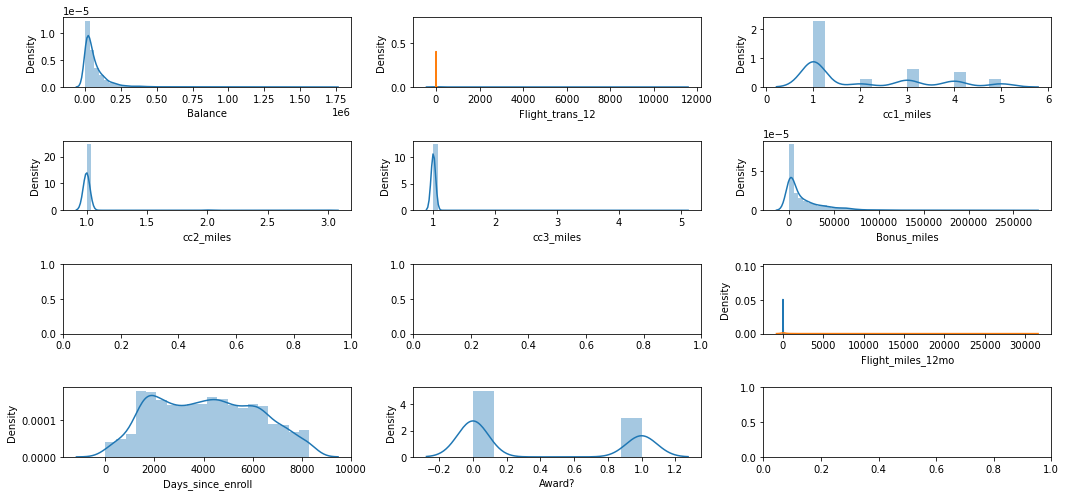

In [65]:
# After the transformation we will see the distribution of the data
fig, ax = plt.subplots(4,3, figsize=(15,7))
sns.distplot(airlines.Balance, ax=ax[0,0])
sns.distplot(airlines.Qual_miles, ax=ax[0,1])
sns.distplot(airlines.cc1_miles, ax=ax[0,2])
sns.distplot(airlines.cc2_miles, ax=ax[1,0])
sns.distplot(airlines.cc3_miles, ax=ax[1,1])
sns.distplot(airlines.Bonus_miles, ax=ax[1,2])
sns.distplot(airlines.Bonus_trans, ax=ax[2,2])
sns.distplot(airlines.Flight_miles_12mo, ax=ax[2,2])
sns.distplot(airlines.Flight_trans_12, ax=ax[0,1])
sns.distplot(airlines.Days_since_enroll, ax = ax[3,0])
sns.distplot(airlines["Award?"], ax = ax[3,1])
plt.tight_layout()
plt.show()

# Now we will make clusters by using heirarchical clustering

In [66]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# We will apply first average linkage method

Text(0.5, 1.0, 'Dendogram')

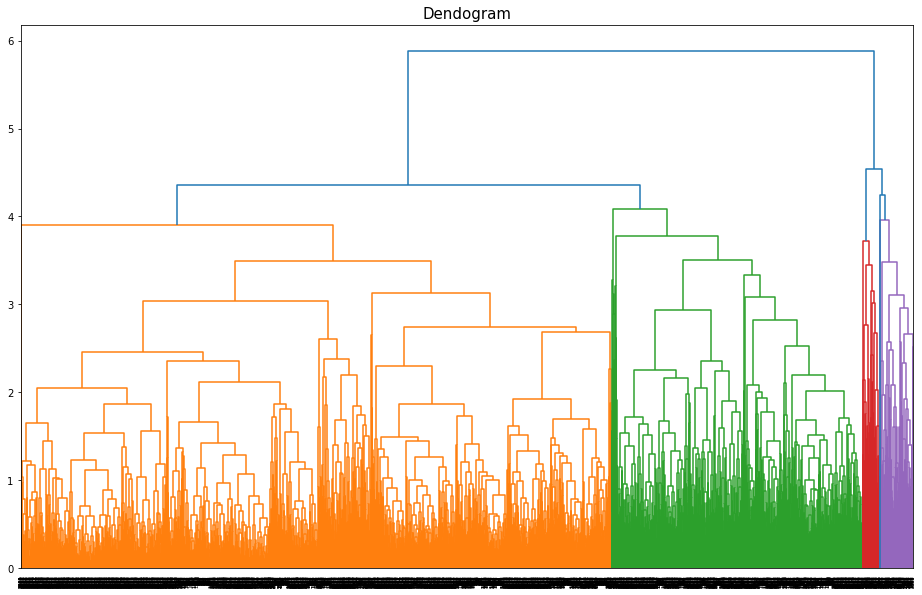

In [67]:
fig = plt.figure(figsize = (16,10))
dendrogram = sch.dendrogram(sch.linkage(x_transformed, method = "average"))
plt.title("Dendogram",size=15)

In [68]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = "average")

In [70]:
y_hc1 = hc1.fit_predict(x_transformed)
Clusters = pd.DataFrame(y_hc1,columns=['Clusters'])

In [71]:
airlines['cluster'] = y_hc1

In [72]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1890.262222,103890.287111,0.000000,2.288000,1.017778,1.016889,23855.316444,15.134222,1289.804444,3.840000,4369.843556,0.546667
1,1,1787.306667,170407.366667,2521.406667,2.286667,1.013333,1.013333,28429.093333,17.893333,2386.106667,7.466667,4499.433333,0.766667
2,2,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000


In [75]:
for i in range(5):
    print("cluster", i)
    #print("The Members: ", (list(airlines[airlines['cluster'] ==i]['ID#'].values)))
    print("Total Members: ", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    

cluster 0
Total Members:  1125
cluster 1
Total Members:  150
cluster 2
Total Members:  75
cluster 3
Total Members:  2648
cluster 4
Total Members:  1


### We will apply now controid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

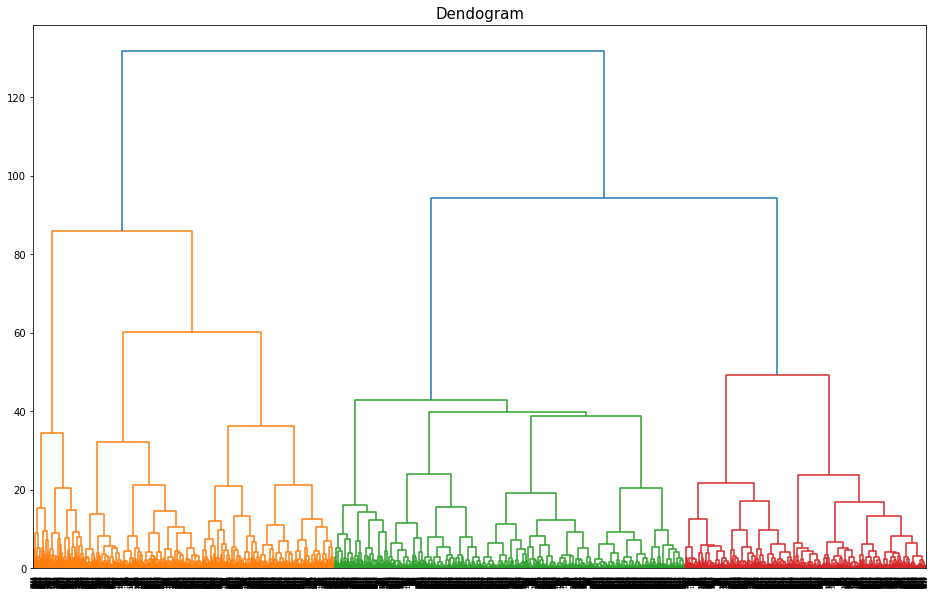

In [76]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(x_transformed,method = "ward"))
plt.title("Dendogram",size=15)

In [77]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')


In [78]:
y_hc2 = hc2.fit_predict(x_transformed)
Clusters = pd.DataFrame(y_hc2,columns=['Clusters'])

In [82]:
airlines['cluster'] = y_hc2

In [83]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1804.159407,88019.900834,0.000000,3.335496,1.000927,1.018536,29472.306766,15.961075,0.000000,0.000000,4510.430028,0.444856
1,1,2110.177066,80532.711636,0.000000,1.000000,1.030354,1.000000,6057.598651,8.924115,1409.374368,4.187184,3987.131535,0.430017
2,2,2269.061823,33404.989165,0.000000,1.000000,1.022307,1.005099,2844.407266,5.497769,0.000000,0.000000,3634.592734,0.152964
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1645.131579,129926.080827,0.000000,3.723684,1.003759,1.035714,43693.750000,22.056391,1156.524436,3.453008,4796.437970,0.676692


In [84]:
for i in range(5):
    print("cluster", i)
    print("Total Members: ", len(list(airlines[airlines['cluster']  == i ]['ID#'].values)))


cluster 0
Total Members:  1079
cluster 1
Total Members:  593
cluster 2
Total Members:  1569
cluster 3
Total Members:  226
cluster 4
Total Members:  532


### We will apply now complete linkage method

Text(0.5, 1.0, 'Dendogram')

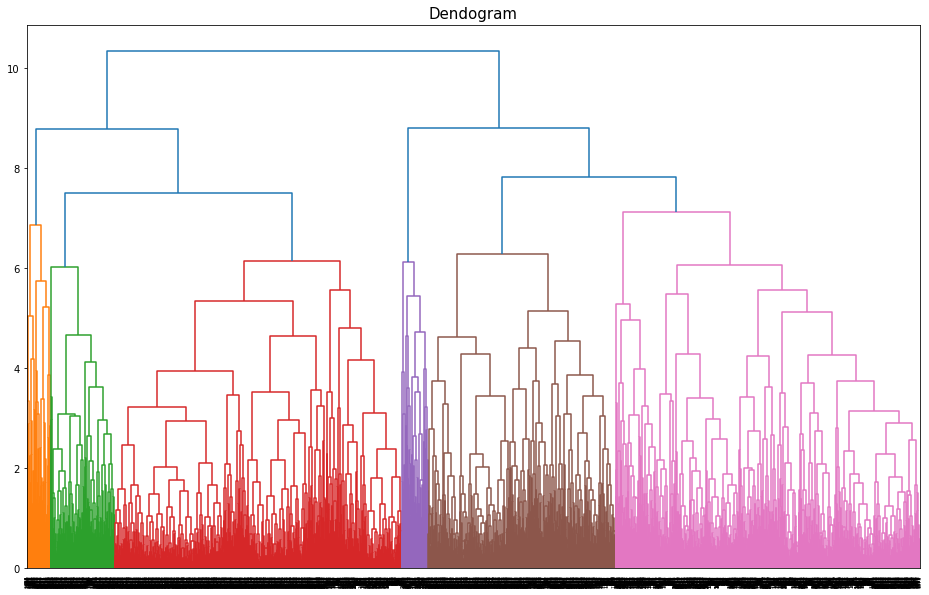

In [85]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(x_transformed, method='complete'))
plt.title("Dendogram",size=15)

In [131]:
y_hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = "complete")

In [134]:
y_hc3 = hc3.fit_predict(x_transformed)
Clusters = pd.DataFrame(y_hc2,columns=['Clusters'])

In [135]:
airlines['cluster'] = y_hc3

In [93]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,"AgglomerativeClustering(linkage='complete', n_...",2014.819455,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343


In [94]:
for i in range(5):
    print("cluster", i)
    print("Total Members: ", len(list(airlines[airlines['cluster']== i]['ID#'].values)))
    

cluster 0
Total Members:  0
cluster 1
Total Members:  0
cluster 2
Total Members:  0
cluster 3
Total Members:  0
cluster 4
Total Members:  0


### We will apply now single linkage method

Text(0.5, 1.0, 'Dendogram')

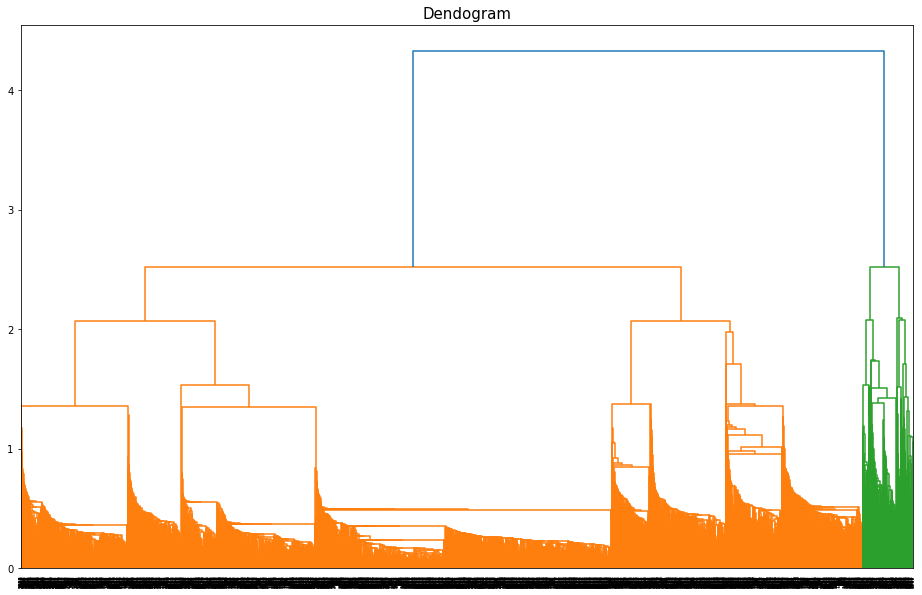

In [97]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(x_transformed, method = 'single'))
plt.title("Dendogram",size=15)

In [102]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [104]:
y_hc4 = hc4.fit_predict(x_transformed)
Clusters = pd.DataFrame(y_hc4,columns=['Cluster'])

In [105]:
airlines['cluster'] = y_hc4

In [109]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2003.310811,58581.243243,2656.797297,2.013514,1.000000,1.000000,15017.662162,9.635135,0.000000,0.000000,4145.337838,0.391892
1,1,1890.262222,103890.287111,0.000000,2.288000,1.017778,1.016889,23855.316444,15.134222,1289.804444,3.840000,4369.843556,0.546667
2,2,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,3925.000000,13004.000000,1000.000000,1.000000,1.000000,1.000000,13890.000000,39.000000,0.000000,0.000000,1572.000000,1.000000


In [110]:
for i in range(5):
    print("cluster", i)
    print("Total Members: ", len(list(airlines[airlines['cluster']==i]['ID#'].values)))

cluster 0
Total Members:  74
cluster 1
Total Members:  1125
cluster 2
Total Members:  151
cluster 3
Total Members:  2648
cluster 4
Total Members:  1


# We will use K-Means clustering method

<function matplotlib.pyplot.show(close=None, block=None)>

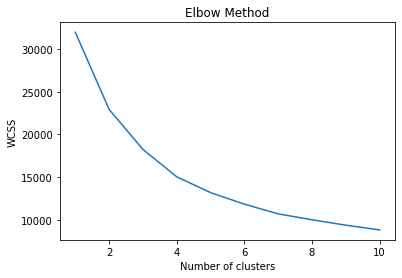

In [112]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [113]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(x_transformed)

KMeans(n_clusters=5, random_state=42)

In [115]:
KM_label=clusters_new.labels_

In [117]:
airlines['cluster'] = clusters_new.labels_

In [118]:
clusters_new.cluster_centers_

array([[-0.66143455, -0.2447433 , -0.83125001,  0.        ,  0.        ,
        -0.79261225, -0.68330804, -0.67497033, -0.30859845, -0.49651014],
       [ 0.74710436, -0.2447433 ,  1.09645214,  0.        ,  0.        ,
         1.04651942,  1.45617648,  1.40937549,  0.36359652,  0.67301786],
       [ 0.38848827, -0.2447433 ,  0.95358077,  0.        ,  0.        ,
         0.60020687, -0.68330804, -0.67497033,  0.25641853,  0.17913025],
       [ 0.00810546, -0.2447433 , -0.82612547,  0.        ,  0.        ,
        -0.2908832 ,  1.45136589,  1.43670198, -0.10501071,  0.06214614],
       [ 0.55635925,  4.08591364,  0.04664589,  0.        ,  0.        ,
         0.3639232 ,  0.76959629,  0.82424735,  0.11393115,  0.57087835]])

In [119]:
a = airlines.iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [120]:
for i in range(5):
    print("cluster", i)
    print("Total Members: ", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))

cluster 0
Total Members:  1501
cluster 1
Total Members:  558
cluster 2
Total Members:  1147
cluster 3
Total Members:  567
cluster 4
Total Members:  226


In [121]:
# importing the metrics for calculating silhouette score
from sklearn import metrics

In [122]:
# Calculating silhouette score for average linkage method
print(metrics.silhouette_score(x_transformed,y_hc1))

0.33005193197422494


In [123]:
# Calculating silhouette score for centroid(ward) linkage method
print(metrics.silhouette_score(x_transformed, y_hc2))

0.3204396364270509


In [137]:
# Calculating silhouette score for complete linkage method
print(metrics.silhouette_score(x_transformed,y_hc3))

0.16072408507603203


In [126]:
# Calculating silhouette score for single linkage method
print(metrics.silhouette_score(x_transformed, y_hc4))

0.3299790968187454


In [138]:
# Calculating silhouette score for K Means method
print(metrics.silhouette_score(x_transformed,clusters_new.labels_))

0.32249600255929045


# Conclusion:-
###                After applying of different type of hierarchical clustering & Kmeans method we found that kmeans clustering is sensitive for outlier but giving high silhouette core & hierarchical clusterical are way more complex to understable & centroid linkage give better result it silhouette score is similar to kmeans clustering, in heirarchical cluster other linkage method have biased clustering means 70% data is belongs to only one cluster so we are predict the result only kmeans clustering

### 5 clusters are perfect for making infrences on the data

### We can see cluster 3 have way more higher mean in all prospectives except only qualifying as a Topflight status & they have 551 members

### cluster 2 have lower mean in all prospectives but the group is qualifying as a Topflight status & the have 1476 members

### And other cluster have average result in all prospectives